In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_C_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,1.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,7.0
2,2.0,2.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,3.0,3.0,2.0,0.0,7.0
3,NaN,2.0,2.0,NaN,0.0,0.0,2.0,0.0,2.0,2.0,...,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,7.0
4,NaN,2.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,2.0,2.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,70.0
354,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,70.0
355,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,70.0
356,2.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,70.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	15
float64		column 2	20
float64		column 3	20
float64		column 4	16
float64		column 5	21
float64		column 6	23
float64		column 7	19
float64		column 8	12
float64		column 9	17
float64		column 10	13
float64		column 11	22
float64		column 12	11
float64		column 13	15
float64		column 14	19
float64		column 15	20
float64		column 16	19
float64		column 17	14
float64		column 18	14
float64		column 19	20
float64		column 20	14
float64		column 21	14
float64		column 22	30
float64		column 23	25
float64		column 24	10
float64		column 25	14
float64		column 26	16
float64		column 27	25
float64		column 28	22
float64		column 29	14
float64		column 30	21
float64		column 31	12
float64		column 32	14
float64		column 33	22
float64		column 34	25


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,343.000000,338.000000,338.000000,342.000000,337.000000,335.000000,339.000000,346.000000,341.000000,345.000000,...,344.000000,342.000000,333.000000,336.000000,344.000000,337.000000,346.000000,344.000000,336.000000,333.000000
mean,2.072886,1.813609,1.571006,1.365497,0.646884,0.459701,0.176991,0.384393,0.604106,0.513043,...,0.406977,0.476608,0.483483,0.925595,0.447674,0.094955,0.115607,1.875000,0.589286,36.480480
std,0.660449,0.704495,0.906285,1.142761,0.911205,0.965274,0.589304,0.837311,0.972496,0.899275,...,0.858881,0.878737,0.980471,1.126532,0.949233,0.439702,0.491598,0.703231,1.132059,15.594361
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,36.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,50.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

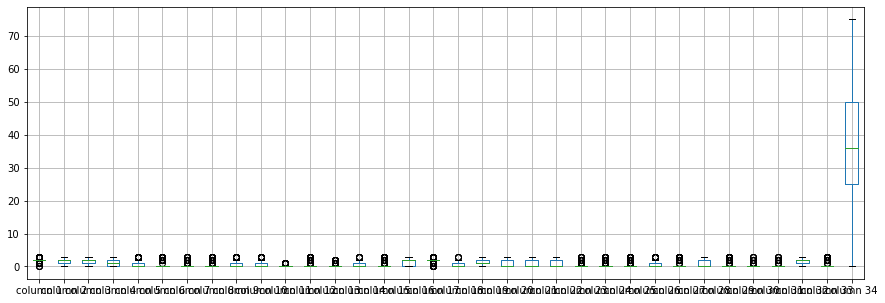

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.072886
column 2      1.813609
column 3      1.571006
column 4      1.365497
column 5      0.646884
column 6      0.459701
column 7      0.176991
column 8      0.384393
column 9      0.604106
column 10     0.513043
column 11     0.122024
column 12     0.409222
column 13     0.148688
column 14     0.554572
column 15     0.325444
column 16     1.368732
column 17     1.953488
column 18     0.505814
column 19     1.304734
column 20     0.656977
column 21     0.979651
column 22     0.685976
column 23     0.315315
column 24     0.362069
column 25     0.406977
column 26     0.476608
column 27     0.483483
column 28     0.925595
column 29     0.447674
column 30     0.094955
column 31     0.115607
column 32     1.875000
column 33     0.589286
column 34    36.480480
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.414605,0.267769,-0.045861,0.005210,0.030938,-0.099383,-0.029348,0.124062,0.198689,...,-0.011189,0.135467,0.004063,0.046741,-0.014291,-0.020374,-0.013781,0.085802,-0.019370,-0.031296
column 2,0.414605,1.000000,0.340118,-0.061194,0.014542,-0.095722,-0.116152,-0.106471,0.257065,0.273226,...,-0.107341,0.184505,-0.129478,0.030999,-0.157273,-0.029215,-0.028757,-0.015405,-0.160330,-0.002267
column 3,0.267769,0.340118,1.000000,-0.048442,0.266594,0.352817,-0.164220,0.312188,0.288028,0.260867,...,0.299274,0.337047,0.318501,-0.227199,0.282004,-0.050389,-0.115477,0.165272,0.311450,0.151556
column 4,-0.045861,-0.061194,-0.048442,1.000000,0.269528,0.412833,-0.154416,0.356968,-0.273256,-0.158027,...,0.359170,-0.167547,0.356212,-0.022149,0.372697,-0.177455,-0.185621,0.057883,0.380979,0.034443
column 5,0.005210,0.014542,0.266594,0.269528,1.000000,0.392630,-0.174228,0.397731,-0.076296,-0.011009,...,0.392339,0.005670,0.356157,-0.000020,0.371779,-0.135347,-0.165296,0.088704,0.374070,0.082123
column 6,0.030938,-0.095722,0.352817,0.412833,0.392630,1.000000,-0.140261,0.883138,-0.275540,-0.252130,...,0.908215,-0.118236,0.937944,0.089551,0.920053,-0.088410,-0.112734,0.288838,0.920986,0.118452
column 7,-0.099383,-0.116152,-0.164220,-0.154416,-0.174228,-0.140261,1.000000,-0.134538,0.241712,-0.004737,...,-0.114968,-0.161177,-0.148693,-0.001610,-0.143286,0.766608,0.856264,-0.084867,-0.136078,-0.389195
column 8,-0.029348,-0.106471,0.312188,0.356968,0.397731,0.883138,-0.134538,1.000000,-0.281913,-0.256999,...,0.880015,-0.096667,0.879543,0.104085,0.864478,-0.078702,-0.110438,0.294917,0.891309,0.109302
column 9,0.124062,0.257065,0.288028,-0.273256,-0.076296,-0.275540,0.241712,-0.281913,1.000000,0.622704,...,-0.266143,0.458907,-0.291339,-0.412109,-0.272507,0.232665,0.277961,-0.085459,-0.277677,-0.101166
column 10,0.198689,0.273226,0.260867,-0.158027,-0.011009,-0.252130,-0.004737,-0.256999,0.622704,1.000000,...,-0.254810,0.478362,-0.252536,-0.425720,-0.250092,-0.035462,-0.007915,0.023602,-0.246907,0.009901


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+22,34+22+22,34+22+22+22,34+22+22+22+22,34+22+22+22+22+22,34+22+22+22+22+22+22,34+22+22+22+22+22+22+22,34+22+22+22+22+22+22,34+22+22+22+22+22,34+22+22+22+22,34+22+22+22,34+22+22,34+22,34], vae_layer = False, seed = 22)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 71.82020568847656
Epoch: 1 , loss: 72.38906201449308
Epoch: 2 , loss: 72.26870502125134
Epoch: 3 , loss: 72.00757876309481
Epoch: 4 , loss: 71.80013569918546
Epoch: 5 , loss: 71.72169598666105
Epoch: 6 , loss: 71.6921341635964
Epoch: 7 , loss: 70.93495975841175
Epoch: 8 , loss: 68.29579266634855
Epoch: 9 , loss: 66.57367688959295
Epoch: 10 , loss: 65.62761861627752
Epoch: 11 , loss: 64.97351837158203
Epoch: 12 , loss: 64.08590871637517
Epoch: 13 , loss: 64.06124791232023
Epoch: 14 , loss: 63.60306947881525
Epoch: 15 , loss: 63.016740798950195
Epoch: 16 , loss: 63.06073778325861
Epoch: 17 , loss: 62.80083812366832
Epoch: 18 , loss: 62.266267949884586
Epoch: 19 , loss: 62.29099533774636
Epoch: 20 , loss: 62.04611639543013
Epoch: 21 , loss: 62.07423851706765
Epoch: 22 , loss: 61.82871437072754
Epoch: 23 , loss: 61.74726070057262
Epoch: 24 , loss: 61.375279513272375
Epoch: 25 , loss: 61.37543643604625
Epoc

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.000000
column 9      3.000000
column 10     2.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.103032
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     1.000000
column 32     1.000000
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [21]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [22]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.032523,0.0,0.0,0.07897,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
4,-0.665170,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,-2.358282,0.000000,0.0,0.0,-1.865214,0.0,0.0
354,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.099304,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
355,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
356,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0


Calculating NRMSE Value

In [23]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [24]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [25]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(94.9595795472424, 758.0725558942231)

In [26]:
NRMS=numerator/denominator
NRMS


0.1252644998277612

In [27]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.000000
column 3      0.000000
column 4      3.000000
column 5      0.494237
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     2.000000
column 16     2.000000
column 17     2.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     3.000000
column 22     0.460819
column 23     0.243993
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     2.000000
column 33     0.000000
column 34    22.000000
Name: 66, dtype: float64

In [28]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.000000,1.0,1.0,1.00000,1.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.0,0.0
1,1.000000,1.0,2.0,0.00000,0.0,0.0,3.0,0.0,3.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,2.0,2.0,2.000000,0.0,7.0
2,2.000000,2.0,1.0,0.00000,0.0,0.0,3.0,0.0,2.0,0.0,...,0.0,0.0,0.000000,2.000000,0.000000,3.0,3.0,2.000000,0.0,7.0
3,2.032523,2.0,2.0,1.07897,0.0,0.0,2.0,0.0,2.0,2.0,...,0.0,0.0,0.000000,2.000000,0.000000,2.0,2.0,2.000000,0.0,7.0
4,1.334830,2.0,1.0,0.00000,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.000000,3.000000,0.000000,2.0,2.0,2.000000,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.000000,2.0,0.0,2.00000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.641718,0.000000,0.0,0.0,1.134786,0.0,70.0
354,2.000000,3.0,2.0,0.00000,0.0,0.0,0.0,0.0,3.0,2.0,...,0.0,0.0,0.099304,0.000000,0.000000,0.0,0.0,1.000000,0.0,70.0
355,2.000000,2.0,2.0,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,2.000000,0.000000,0.0,0.0,2.000000,0.0,70.0
356,2.000000,1.0,0.0,3.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,70.0


In [29]:
imputations[-1].to_excel("DERM_C_5(imp).xlsx", index=False, header=False)